In [115]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [166]:
data=pd.read_csv("ex2data2.txt")
data

,test1,test2,output
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


In [167]:
x=data["test1"]
y=data["test2"]
op=data["output"]

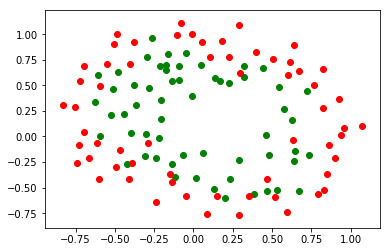

In [168]:
for i in range(0,118):
    if(op[i]==1):
        plt.scatter(x[i],y[i],color='g')
    else:
        plt.scatter(x[i],y[i],color='r')

In [169]:
def sigmoid(h):
    return (1/(1+np.exp(-h)))

In [170]:
theta=np.ones((3,1))
x0=np.ones((118,3))
for i in range(0,118):
    x0[i][1]=x[i]
    x0[i][2]=y[i]
h=np.dot(x0,theta)
h

array([[ 1.7508270e+00],
       [ 1.5921980e+00],
       [ 1.4785400e+00],
       [ 1.1271900e+00],
       [ 9.5239000e-01],
       [ 6.8503000e-01],
       [ 6.3631700e-01],
       [ 5.0187000e-01],
       [ 6.1246500e-01],
       [ 6.1802000e-01],
       [ 8.2031000e-01],
       [ 1.0081800e+00],
       [ 1.3954000e+00],
       [ 1.5518100e+00],
       [ 2.0342300e+00],
       [ 1.9046000e+00],
       [ 1.7052100e+00],
       [ 1.7698610e+00],
       [ 1.5261700e+00],
       [ 1.1550800e+00],
       [ 9.9181000e-01],
       [ 7.0560000e-01],
       [ 4.1122700e-01],
       [ 3.0626000e-01],
       [ 4.8729000e-01],
       [ 5.9943000e-01],
       [ 9.3019000e-01],
       [ 1.1375700e+00],
       [ 1.4072300e+00],
       [ 1.4856200e+00],
       [ 1.6971700e+00],
       [ 1.6400300e+00],
       [ 1.4750000e+00],
       [ 1.1901200e+00],
       [ 9.4865000e-01],
       [ 7.2692700e-01],
       [ 5.4907000e-01],
       [ 7.5112000e-01],
       [ 8.9977800e-01],
       [ 8.1829000e-01],


In [171]:
def update(theta,x0,cur,op,h):
    s=0
    s1=0
    s2=0
    for i in range(0,118):
        if i==cur:
            continue
        a=sigmoid(h[i])-op[i]
        if x0[i][1]>x0[cur][1]:
            z=(x0[i][1]-x0[cur][1])*100
        else:
            z=(x0[cur][1]-x0[i][1])*100
        if x0[i][2]>x0[cur][2]:
            z1=(x0[i][2]-x0[cur][2])*100
        else:
            z1=(x0[cur][2]-x0[i][2])*100
        s=s+(np.exp(-((z*z1)/(2*400))))*a
        s1=s1+(np.exp(-((z*z1)/(2*400))))*a*(x0[i][1])
        s2=s2+(np.exp(-((z*z1)/(2*400))))*a*(x0[i][2])
    temp0=theta[0]*(1-(0.029/118.0))-(s/118.0)*0.029
    temp1=theta[1]*(1-(0.029/118.0))-(s1/118.0)*0.029
    temp2=theta[2]*(1-(0.029/118.0))-(s2/118.0)*0.029
    theta[0]=temp0
    theta[1]=temp1
    theta[2]=temp2
    return theta

In [172]:
def prob(a,b,theta):
    return sigmoid(theta[0]+theta[1]*a+theta[2]*b)

In [175]:
p=np.ones((118,1))
for cur in range(0,118):
    theta=np.ones((3,1))
    h=np.dot(x0,theta)
    print("new")
    print(cur)
    for j in range(0,1200):
        cost=0
        for i in range(0,118):
            if i==cur:
                continue
            a=sigmoid(h[i])-op[i]
            if x0[i][1]>x0[cur][1]:
                z=(x0[i][1]-x0[cur][1])*100
            else:
                z=(x0[cur][1]-x0[i][1])*100
            if x0[i][2]>x0[cur][2]:
                z1=(x0[i][2]-x0[cur][2])*100
            else:
                z1=(x0[cur][2]-x0[i][2])*100
            cost=cost+(np.exp(-(((z*z1)/(2*400))))*((-op[i]*(np.log(sigmoid(h[i])))))-(((1-op[i])*(np.log(1-sigmoid(h[i]))))))
        if j%100==0:
            print(cost)
        theta=update(theta,x0,cur,op,h)
        h=x0.dot(theta)
        p[cur]=prob(x0[cur][1],x0[cur][2],theta)
    if(op[cur]==1and(p[cur]>=0.5)):
        tt=tt+1
    if(op[cur]==0and(p[cur]<0.5)):
        tt+=1
tt=(tt*1.0)/118
tt*=100.0
print(tt)

new
0
[98.75699228]
[87.15606757]
[78.72333299]
[72.79754232]
[68.71391794]
[65.92567981]
[64.030618]
[62.74934562]
[61.89231054]
[61.33136927]
[60.97926163]
[60.77583508]
new
1
[99.71682158]
[89.21761811]
[81.64711002]
[76.33085821]
[72.64641429]
[70.10351865]
[68.34854523]
[67.13727983]
[66.30374701]
[65.73515913]
[65.35425061]
[65.10747917]
new
2
[100.33533606]
[91.55958656]
[85.0921386]
[80.39908893]
[77.01337406]
[74.56879976]
[72.79569454]
[71.50172785]
[70.55145949]
[69.84963234]
[69.32892364]
[68.94138612]
new
3
[100.68528214]
[95.11424927]
[90.80547136]
[87.47583691]
[84.8948067]
[82.8821919]
[81.30047813]
[80.04601712]
[79.04108619]
[78.2274418]
[77.56135335]
[77.00987741]
new
4
[99.56142059]
[93.74398022]
[89.26442063]
[85.82162902]
[83.17001027]
[81.11791051]
[79.51944572]
[78.26492731]
[77.27224031]
[76.47988882]
[75.84168035]
[75.32276909]
new
5
[99.15484705]
[93.65676144]
[89.29191691]
[85.8172305]
[83.03552043]
[80.791723]
[78.965947]
[77.46621261]
[76.22208862]
[75.179

[77.28623091]
[73.25455657]
[70.2855715]
[68.12340411]
[66.56668696]
[65.46210459]
[64.69492969]
[64.17989763]
[63.85366475]
new
48
[97.90926005]
[85.78806636]
[76.6569086]
[70.02834453]
[65.34190552]
[62.08606093]
[59.85304165]
[58.34218021]
[57.34056944]
[56.69987709]
[56.31690778]
[56.11936928]
new
49
[97.81817303]
[84.96667021]
[75.44742049]
[68.66507118]
[63.95032735]
[60.7148816]
[58.50853261]
[57.01176949]
[56.00572187]
[55.3420714]
[54.91996089]
[54.67005324]
new
50
[99.10485747]
[89.57664297]
[82.28167304]
[76.82576567]
[72.81043218]
[69.88579427]
[67.77069439]
[66.25096041]
[65.16817065]
[64.40669522]
[63.88241002]
[63.53395032]
new
51
[99.9893702]
[94.45841044]
[89.95229292]
[86.307834]
[83.37529904]
[81.02354786]
[79.14150545]
[77.63726444]
[76.43596303]
[75.4772342]
[74.71269119]
[74.10367402]
new
52
[100.46433856]
[93.10228701]
[87.51127127]
[83.31875053]
[80.19570472]
[77.87478028]
[76.14961922]
[74.86556839]
[73.90842935]
[73.1943414]
[72.66172452]
[72.26522672]
new
53


[67.60324443]
[65.94684538]
[64.69832443]
[63.75916063]
[63.05508161]
[62.5301712]
new
95
[95.12679147]
[88.64289796]
[83.21421689]
[78.72555566]
[75.05029211]
[72.06257358]
[69.64585971]
[67.69751181]
[66.13024252]
[64.87155676]
[63.86215975]
[63.05399921]
new
96
[93.408767]
[83.3409975]
[74.90746988]
[67.99662074]
[62.432892]
[58.00961002]
[54.51981355]
[51.77662024]
[49.62229619]
[47.92930643]
[46.59715668]
[45.54775014]
new
97
[94.61710564]
[83.31352356]
[74.47140804]
[67.78756536]
[62.86252013]
[59.29466936]
[56.73824304]
[54.92190693]
[53.6436877]
[52.75718413]
[52.15730712]
[51.7685809]
new
98
[93.5706663]
[80.19827447]
[69.7108866]
[61.81053264]
[56.03250554]
[51.88207287]
[48.92753301]
[46.8329099]
[45.35269739]
[44.31286893]
[43.59130767]
[43.10215014]
new
99
[93.98238106]
[80.65113453]
[70.35405953]
[62.71135115]
[57.19938102]
[53.29258216]
[50.54864659]
[48.63154337]
[47.29976325]
[46.38407076]
[45.76664841]
[45.36510159]
new
100
[95.24569808]
[84.95061122]
[76.95146458]
[7

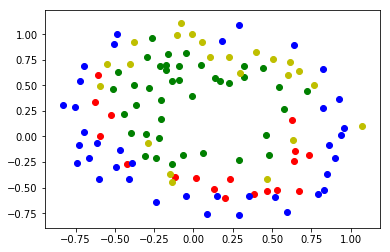

In [176]:
for i in range(0,118):
    if(op[i]==1and(p[i])>=0.5):
        plt.scatter(x[i],y[i],color="g")
    if(op[i]==1and(p[i])<0.5):
        plt.scatter(x[i],y[i],color="r")    
    if(op[i]==0and(p[i])>=0.5):
        plt.scatter(x[i],y[i],color="y")
    if(op[i]==0and(p[i])<0.5):
        plt.scatter(x[i],y[i],color="b")

In [179]:
tt=0
for i in range(0,118):
    if((op[i]==1 and p[i]>=0.5)or(op[i]==0 and p[i]<0.5)):
        tt+=1
tt*=100.0
tt/=118.0
tt

65.2542372881356